In [ ]:
# Creating clean data for every las file in the current directory as a new las file

In [3]:
#local version
import laspy
import numpy as np
import os


def filter_point_cloud(las_path, output_path, quarter_size=1000):
    # Load the LAS file
    las = laspy.read(las_path)

    # Compute the x, y, and z quartiles
    x_quarter = np.percentile(las.x, [25, 50, 75])
    y_quarter = np.percentile(las.y, [25, 50, 75])
    z_quarter = np.percentile(las.z, [25, 50, 75])

    # Filter out points outside the inner quartile range
    x_mask = np.logical_and(las.x >= x_quarter[0] - quarter_size, las.x <= x_quarter[2] + quarter_size)
    y_mask = np.logical_and(las.y >= y_quarter[0] - quarter_size, las.y <= y_quarter[2] + quarter_size)
    z_mask = np.logical_and(las.z >= z_quarter[0] - quarter_size, las.z <= z_quarter[2] + quarter_size)
    mask = np.logical_and(np.logical_and(x_mask, y_mask), z_mask)
    las_filtered = las[mask]

    # Write the filtered point cloud to a new LAS file
    las_filtered.write(output_path)

input_dir = "./"
output_dir = "./"

for filename in os.listdir(input_dir):
    if filename.endswith(".las"):
        las_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, "quartile_denoised_" + filename)
        filter_point_cloud(las_path, output_path)


In [8]:
import laspy
import numpy as np
import os

def filter_point_cloud(las_path, output_path, quarter_size=1000):
    # Load the LAS file
    las = laspy.read(las_path)

    # Compute the x, y, and z quartiles
    x_quarter = np.percentile(las.x, [25, 50, 75])
    y_quarter = np.percentile(las.y, [25, 50, 75])
    z_quarter = np.percentile(las.z, [25, 50, 75])

    # Filter out points outside the inner quartile range
    x_mask = np.logical_and(las.x >= x_quarter[0] - quarter_size, las.x <= x_quarter[2] + quarter_size)
    y_mask = np.logical_and(las.y >= y_quarter[0] - quarter_size, las.y <= y_quarter[2] + quarter_size)
    z_mask = np.logical_and(las.z >= z_quarter[0] - quarter_size, las.z <= z_quarter[2] + quarter_size)
    mask = np.logical_and(np.logical_and(x_mask, y_mask), z_mask)
    las_filtered = las[mask]

    # Write the filtered point cloud to a new LAS file
    las_filtered.write(output_path)

new_dir_path = './Cleaned_Data_Quarterlies'
os.makedirs(new_dir_path, exist_ok=True)

input_dir = "./"
output_dir = new_dir_path

for filename in os.listdir(input_dir):
    if filename.endswith(".las"):
        try:
            las_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)
            filter_point_cloud(las_path, output_path)
            print("Input file: " + las_path )
            print("File processed and cleaned and stored at : " + output_path)
        except:
            print("The file is corrupted: " + las_path)

print("Finished processing all encountered .LAS files.")

Boxplot graphs for each .las file

df.boxplot(column='Z', by='classification')


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

#used to load .las data into a laspy object.
def load_laspy(las_location):
      input_las = laspy.read(las_location)
      
      return input_las


# Convert a .LAS file into a pandas object.
def convert_laspy_pandas(input_las):
    # Convert data into pandas DataFrame
    df = pd.DataFrame({"X":input_las.X,"Y":input_las.Y,"Z":input_las.Z,
      "x":np.array(input_las.x),"y":np.array(input_las.y),"z":np.array(input_las.z),
     'intensity': input_las.intensity,
      'classification': input_las.classification,
      'return_number': np.array(input_las.return_number),
      'number_of_returns':np.array(input_las.number_of_returns),
      'synthetic':np.array(input_las.synthetic),
      'key_point':np.array(input_las.key_point),
      'withheld':np.array(input_las.withheld),
      'overlap':np.array(input_las.overlap),
      'scanner_channel':np.array(input_las.scanner_channel),
      'scan_direction_flag':np.array(input_las.scan_direction_flag),
      'user_data':input_las.user_data,
      'scan_angle':input_las.scan_angle,
      'point_source_id':input_las.point_source_id,
      'gps_time':input_las.gps_time    
      })

    return df


def export_boxplot(df,sub_dir,column = "X",by = "classification"):
    #Select which spatial dimension you wish to create a boxplot for
    if column == "X":
        column = "X"
    elif column == "Y":
        column = "Y"
    elif column == "Z":
        column = "Z"
    else:
        raise ValueError("column must be either X,Y, or Z.")
    
    df.boxplot(column=column, by='classification')
    plt.title("Boxplot of Classification Values for Dimension: " +str(column))
    
    #Create filename and save
    plot_file = os.path.join(sub_dir,'boxplot_{}.png'.format(str(column)))
    plt.savefig(plot_file, dpi=300, bbox_inches='tight')


Classification_Distribution_Boxplots/quartile_denoised_200-145624063.las
no


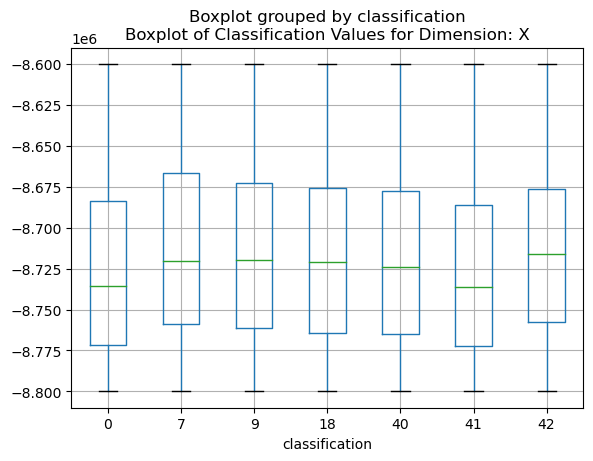

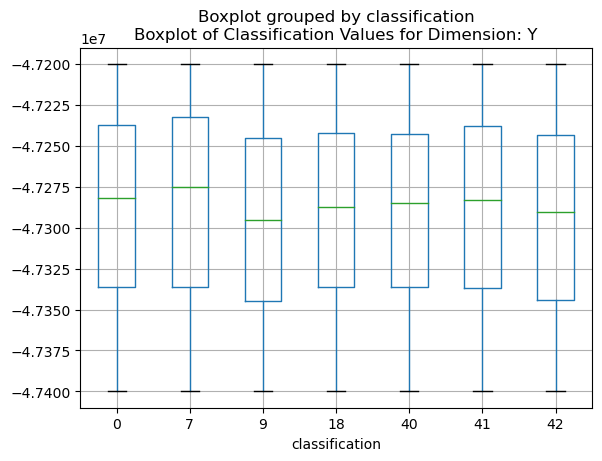

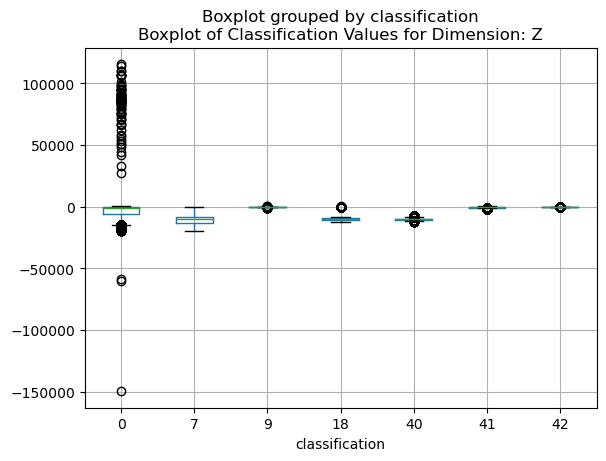

In [40]:
import re

new_dir_path = 'Classification_Distribution_Boxplots'
os.makedirs(new_dir_path, exist_ok=True)

input_dir = "./"
output_dir = new_dir_path

for filename in os.listdir(input_dir):
    if filename.endswith(".las"):
        try:
            #os.makedirs(new_dir_path+ )
            las_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)

            numbers = re.findall("\d+", filename)
            words = re.findall('[a-zA-Z]+', filename)
            sub_dir = os.path.join(new_dir_path,words[0]+"_"+words[1]+"_"+numbers[0]+"-"+numbers[1])
            os.makedirs(sub_dir, exist_ok=False)

            input_las = load_laspy(las_location=las_path)

            #create a pandas object
            df = convert_laspy_pandas(input_las)

            export_boxplot(df=df,sub_dir=sub_dir, column="X",by="classification")
            export_boxplot(df=df,sub_dir=sub_dir, column="Y",by="classification")
            export_boxplot(df=df,sub_dir=sub_dir, column="Z",by="classification")
            
            print(output_path)
        except:
            print("no")

In [38]:
new_dir_path = './Classification_Distribution_Boxplots'
os.makedirs(new_dir_path, exist_ok=True)

input_dir = "./"
output_dir = new_dir_path

for filename in os.listdir(input_dir):
    if filename.endswith(".las"):
        try:
            las_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)

            #create a laspy object
            input_las = load_laspy(las_location=las_path)
            #create a pandas object
            df = convert_laspy_pandas(input_las)
            #export boxplot for each spatial dimension
            export_boxplot(df=df,subdir=sub_dir, column="X",by="classification")
            export_boxplot(df=df, column="Y",by="classification")
            export_boxplot(df=df, column="Z",by="classification")
            

            #convert the .las file to a laspy object

        
        except:
            print("The current file could not generate a boxplot")

The current file could not generate a boxplot
The current file could not generate a boxplot
